**Dataset Description: Insurance Dataset (Claim Prediction)**

This dataset contains demographic and medical information about patients, along with their respective insurance claim amounts. It is used to predict the insurance claim cost using an Artificial Neural Network (ANN).

**Objective**

To build a machine learning model (ANN) that accurately predicts the insurance claim amount based on the patient’s demographic and health-related features.

**Attributes**

*   **PatientID**	Unique identifier for each patient (used only for reference, not for training).

* **age**	Age of the patient (in years).   
* **gender** Biological sex of the patient (Male/Female).
* **bmi**	Body Mass Index, a measure of body fat based on height and weight.
* **bloodpress**	Blood pressure level (systolic).
* **diabetic**	Whether the patient is diabetic (Yes/No).
* **children**	Number of children/dependents covered under the insurance policy.
* **smoker**	Whether the patient smokes (Yes/No).
* **region**	Residential region in the U.S. (southeast, southwest, northeast, northwest).
* **claim**	Target Variable – Medical insurance claim amount (in dollars).



**Importing the required Libraries**

*   Numpy
*   Pandas
*   sklearn











In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder

**Loading the Dataset**

In [50]:
df = pd.read_csv('insurance_data.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39,Male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24,Male,30.1,87,No,0,No,southeast,1131.51
2,7,8,19,Male,41.1,100,No,0,No,northwest,1146.80
3,8,9,20,Male,43.0,86,No,0,No,northwest,1149.40
4,9,10,30,Male,53.1,97,No,0,No,northwest,1163.46


 **Encoding categorical variables**

 Binary categorical variables (gender, diabetic, and smoker) were converted into numeric format using Label Encoding, where each category was mapped to a numerical value:

Male: 1, Female: 0  
Yes: 1, No: 0

The region column contains more than two categories (southeast, southwest, northwest, northeast), so One-Hot Encoding was used to convert it into multiple binary columns.

To prevent multicollinearity, we used drop_first=True which drops one of the dummy variables.

After encoding, new columns like region_northwest, region_southeast, and region_southwest were created, while one base category was dropped.



In [51]:
df['gender']= LabelEncoder().fit_transform(df['gender'])
df['smoker']= LabelEncoder().fit_transform(df['smoker'])
df['diabetic']= LabelEncoder().fit_transform(df['diabetic'])
df= pd.get_dummies(df, columns= ['region'], drop_first= True)


**Features and** **target**

**x:** The input features used for training the ANN.(dropping 2 columns which are of no use)

**y:** The target variable we want to predict — in this case, the insurance claim.



In [52]:
x= df.drop(['PatientID' , 'claim'] , axis=1)
y= df['claim']
print(x)

      index  age  gender   bmi  bloodpressure  diabetic  children  smoker  \
0         0   39       1  23.2             91         1         0       0   
1         1   24       1  30.1             87         0         0       0   
2         7   19       1  41.1            100         0         0       0   
3         8   20       1  43.0             86         0         0       0   
4         9   30       1  53.1             97         0         0       0   
...     ...  ...     ...   ...            ...       ...       ...     ...   
1327   1335   44       0  35.5             88         1         0       1   
1328   1336   59       0  38.1            120         0         1       1   
1329   1337   30       1  34.5             91         1         3       1   
1330   1338   37       1  30.4            106         0         0       1   
1331   1339   30       0  47.4            101         0         0       1   

      region_northwest  region_southeast  region_southwest  
0             

**Splitting dataset into training-validation-testing dataset**

( 70% - 15% - 15%)

In [53]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state = 42)

x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state = 42)

**Getting the total size of each splitted dataset**

In [54]:
print(f"Train set: {x_train.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test.shape}")


Train set: (932, 11)
Validation set: (200, 11)
Test set: (200, 11)


**Normalization of Numerical data**

To ensure stable and efficient training of the Artificial Neural Network (ANN), all numerical features in the dataset were normalized using standardization. This process transforms the data so that each feature has a mean of 0 and a standard deviation of 1, using StandardScaler() from the sklearn.preprocessing module.


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled= scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

**ANN model**

In this lab, an Artificial Neural Network (ANN) was built using TensorFlow Keras to predict insurance claim amounts. The model consisted of an input layer followed by two hidden layers with 64 and 32 neurons, both using the ReLU activation function. The output layer had one neuron with a linear activation, suitable for regression tasks.

The model was compiled with the Adam optimizer, using Mean Squared Error (MSE) as the loss function and Mean Absolute Error (MAE) as a performance metric. It was trained for 100 epochs with a batch size of 32, and evaluated using separate validation and test datasets to assess accuracy and generalization.

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1], activation = 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics = ['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Early Stopping in ANN Training**

EarlyStopping callback is used to stop training early if the model stops improving on the validation set, which helps avoid overfitting.

* Preventing overfitting
* Saving training time


In [83]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=100,
    batch_size=16,
    callbacks = [early_stop]
)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1975037.6250 - mae: 733.8955 - val_loss: 1957834.1250 - val_mae: 816.5017
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1793823.1250 - mae: 709.3750 - val_loss: 1946733.1250 - val_mae: 812.9816
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1757386.5000 - mae: 680.1954 - val_loss: 1953471.5000 - val_mae: 814.3936
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2761705.2500 - mae: 754.2345 - val_loss: 1924257.1250 - val_mae: 805.6267
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1604405.2500 - mae: 664.9785 - val_loss: 1940428.3750 - val_mae: 807.8687
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2621652.5000 - mae: 753.1593 - val_loss: 1897840.1250 - val_mae: 799.6666
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1287167.2500 - mae: 664.1358 - val_loss: 1945710.7500 - val_mae: 812.7845
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1039904.8

**Training vs Validation Loss**

Both train and validation losses are decreasing steadily and there is no overfitting- validation loss follows the same downward trend as training loss

This graph shows our model is training well and generalizing effectively.

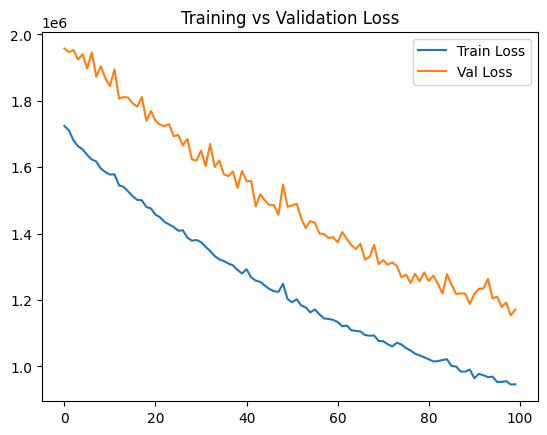

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

**Mae**

On average, the model's prediction is off by ~646 units.A low MAE indicating accurate predictions on the test set

In [78]:
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"Test MAE: {test_mae}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1006159.3125 - mae: 646.5801
Test MAE: 658.6261596679688


**R2-Score**

model generalizes well to unseen data with low error, especially considering your earlier R² score of 0.991.

In [80]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test_scaled).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
R² Score: 0.9917430206950615


**Actual vs Predicted**

The plot visually confirms that the ANN model performs well, with predicted values closely matching the actual insurance claims.


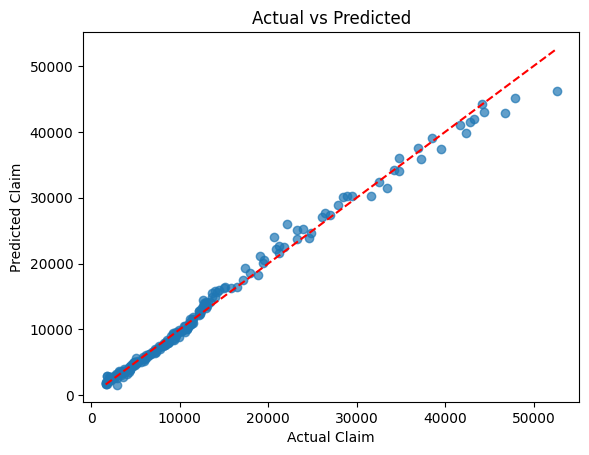

In [81]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Claim")
plt.ylabel("Predicted Claim")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()
